In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 2

***The dataset Education - Post 12th Standard.csv contains information on various colleges. 
You are expected to do a Principal Component Analysis for this case study according to the instructions given. 
The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.***

In [2]:
# Read the data.
df = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [3]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [4]:
df.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [5]:
# Get the shape

df.shape

(777, 18)

In [6]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [7]:
df.info()

# We can see that other than Names attribute others are int64 or float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [8]:
# Summary of the dataset

df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [9]:
# Check the Names attribute

df['Names'].unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

In [10]:
# Check for null values

df.isna().sum().sum()

# No na values for any attributes.

0

In [11]:
# Check for duplicates

dups = df.duplicated()
print('Number of duplicate rows = %d' %(dups.sum()))
df[dups]

# No duplicate rows found.

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

## Uni Variate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and 

Text(0.5, 1.0, 'Top 25% Students Distribution')

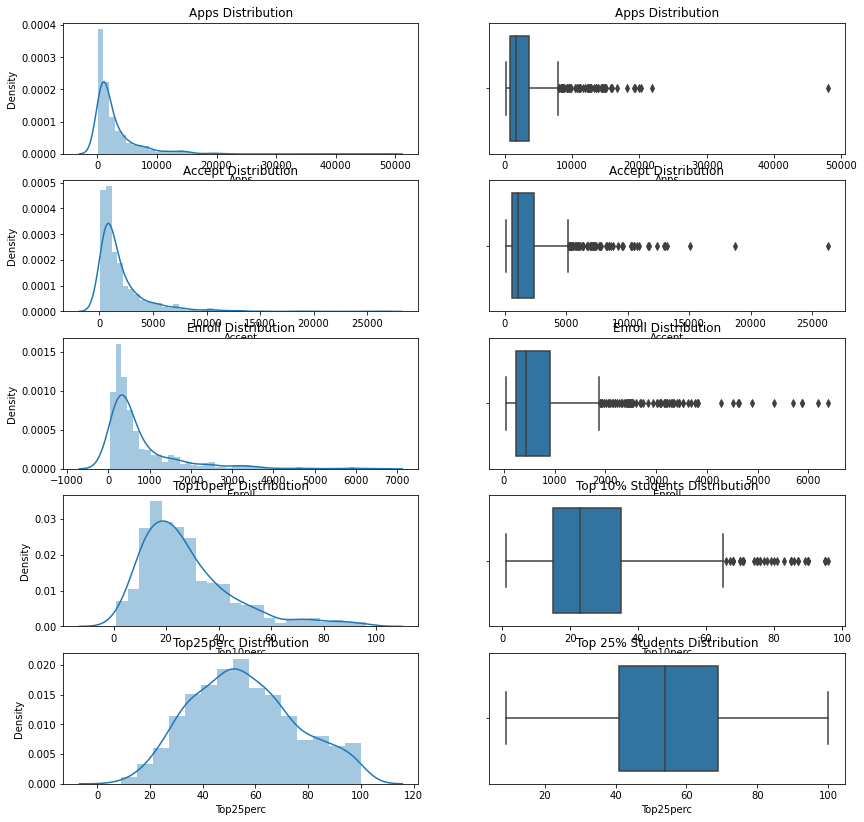

In [12]:
## Univariate analysis for all attributes except for Names attribute

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(14, 14)

a = sns.distplot(df['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=12)
a = sns.boxplot(df['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=12)

a = sns.distplot(df['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=12)
a = sns.boxplot(df['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=12)

a = sns.distplot(df['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=12)
a = sns.boxplot(df['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=12)

a = sns.distplot(df['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=12)
a = sns.boxplot(df['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top 10% Students Distribution",fontsize=12)


a = sns.distplot(df['Top25perc'] , ax=axes[4][0])
a.set_title("Top25perc Distribution",fontsize=12)
a = sns.boxplot(df['Top25perc'] , orient = "v" , ax=axes[4][1])
a.set_title("Top 25% Students Distribution",fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and 

Text(0.5, 1.0, 'Room and Board Distribution')

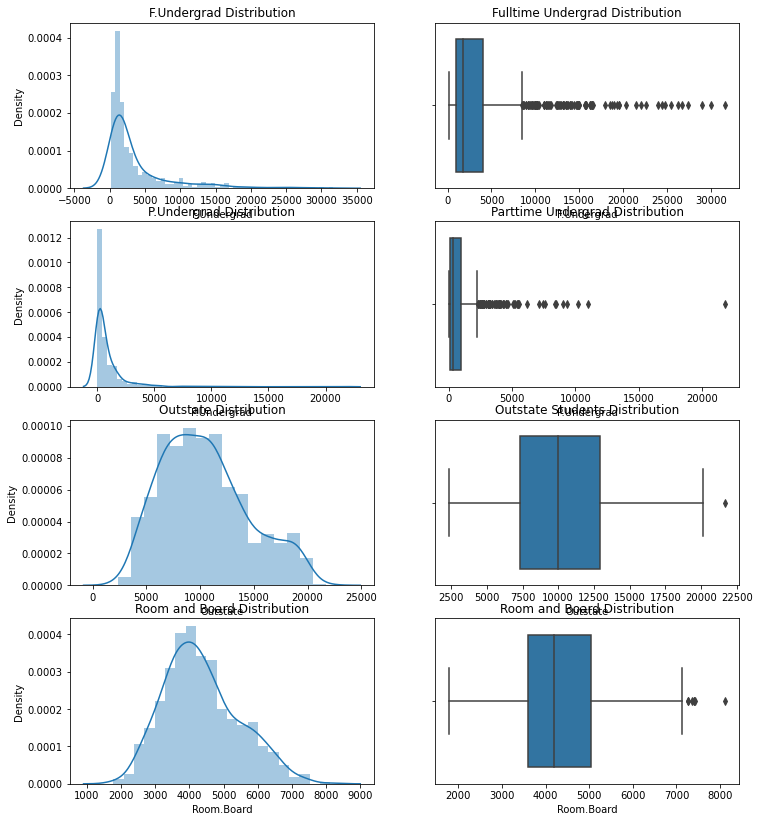

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['F.Undergrad'] , ax=axes[0][0])
a.set_title("F.Undergrad Distribution",fontsize=12)
a = sns.boxplot(df['F.Undergrad'] , orient = "v" , ax=axes[0][1])
a.set_title("Fulltime Undergrad Distribution",fontsize=12)

a = sns.distplot(df['P.Undergrad'] , ax=axes[1][0])
a.set_title("P.Undergrad Distribution",fontsize=12)
a = sns.boxplot(df['P.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("Parttime Undergrad Distribution",fontsize=12)

a = sns.distplot(df['Outstate'] , ax=axes[2][0])
a.set_title("Outstate Distribution",fontsize=12)
a = sns.boxplot(df['Outstate'] , orient = "v" , ax=axes[2][1])
a.set_title("Outstate Students Distribution",fontsize=12)

a = sns.distplot(df['Room.Board'] , ax=axes[3][0])
a.set_title("Room and Board Distribution",fontsize=12)
a = sns.boxplot(df['Room.Board'] , orient = "v" , ax=axes[3][1])
a.set_title("Room and Board Distribution",fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and 

Text(0.5, 1.0, 'Faculty Terminal Degree Distribution')

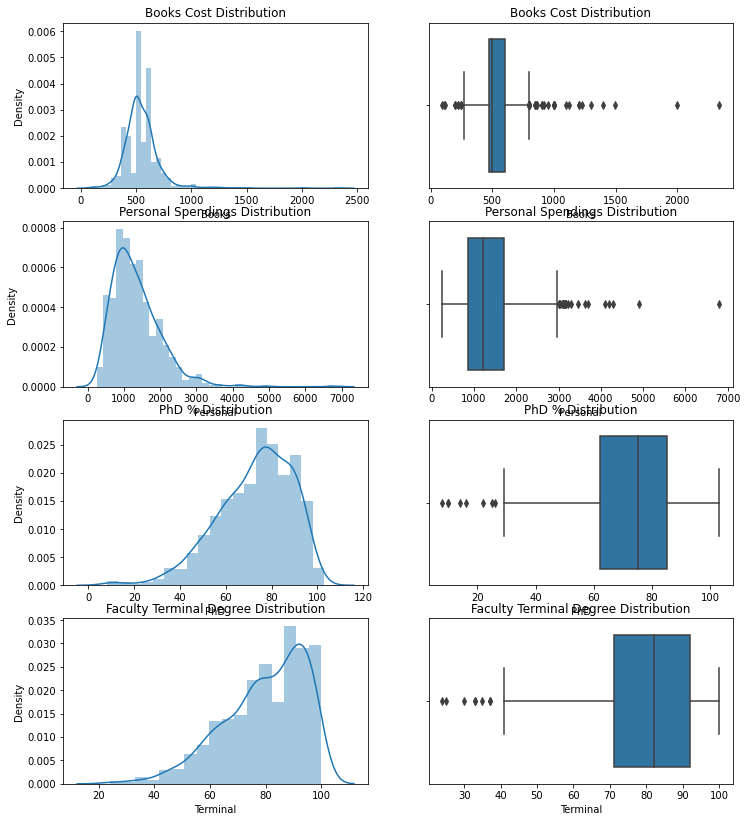

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['Books'] , ax=axes[0][0])
a.set_title("Books Cost Distribution",fontsize=12)
a = sns.boxplot(df['Books'] , orient = "v" , ax=axes[0][1])
a.set_title("Books Cost Distribution",fontsize=12)

a = sns.distplot(df['Personal'] , ax=axes[1][0])
a.set_title("Personal Spendings Distribution",fontsize=12)
a = sns.boxplot(df['Personal'] , orient = "v" , ax=axes[1][1])
a.set_title("Personal Spendings Distribution",fontsize=12)

a = sns.distplot(df['PhD'] , ax=axes[2][0])
a.set_title("PhD % Distribution",fontsize=12)
a = sns.boxplot(df['PhD'] , orient = "v" , ax=axes[2][1])
a.set_title("PhD % Distribution",fontsize=12)

a = sns.distplot(df['Terminal'] , ax=axes[3][0])
a.set_title("Faculty Terminal Degree Distribution",fontsize=12)
a = sns.boxplot(df['Terminal'] , orient = "v" , ax=axes[3][1])
a.set_title("Faculty Terminal Degree Distribution",fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and 

Text(0.5, 1.0, 'Graduation Rate Distribution')

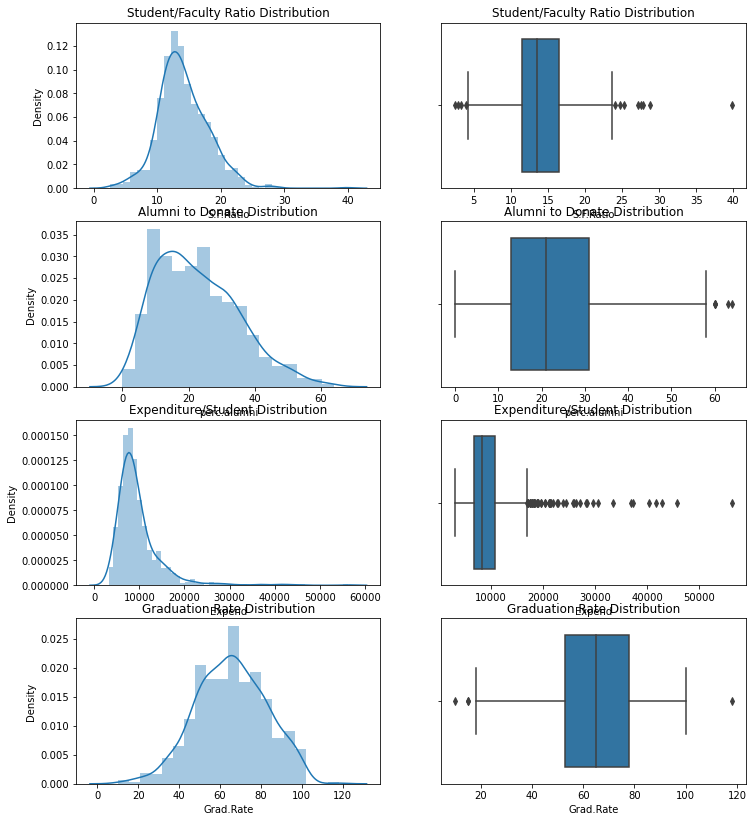

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['S.F.Ratio'] , ax=axes[0][0])
a.set_title("Student/Faculty Ratio Distribution",fontsize=12)
a = sns.boxplot(df['S.F.Ratio'] , orient = "v" , ax=axes[0][1])
a.set_title("Student/Faculty Ratio Distribution",fontsize=12)

a = sns.distplot(df['perc.alumni'] , ax=axes[1][0])
a.set_title("Alumni to Donate Distribution",fontsize=12)
a = sns.boxplot(df['perc.alumni'] , orient = "v" , ax=axes[1][1])
a.set_title("Alumni to Donate Distribution",fontsize=12)

a = sns.distplot(df['Expend'] , ax=axes[2][0])
a.set_title("Expenditure/Student Distribution",fontsize=12)
a = sns.boxplot(df['Expend'] , orient = "v" , ax=axes[2][1])
a.set_title("Expenditure/Student Distribution",fontsize=12)

a = sns.distplot(df['Grad.Rate'] , ax=axes[3][0])
a.set_title("Graduation Rate Distribution",fontsize=12)
a = sns.boxplot(df['Grad.Rate'] , orient = "v" , ax=axes[3][1])
a.set_title("Graduation Rate Distribution",fontsize=12)

## Bi-Variate Analysis

In [16]:
df.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

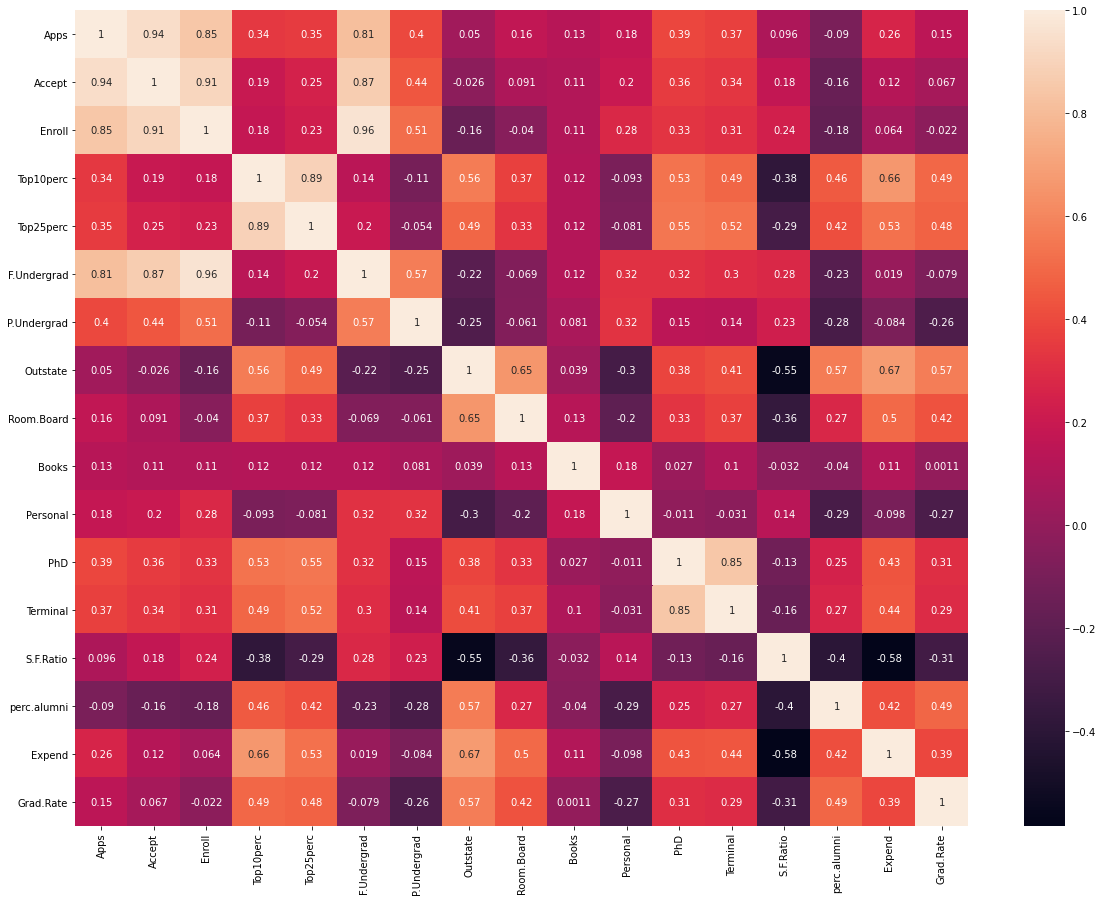

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [18]:
# Names would be the target variable and should be removed when PCA is done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

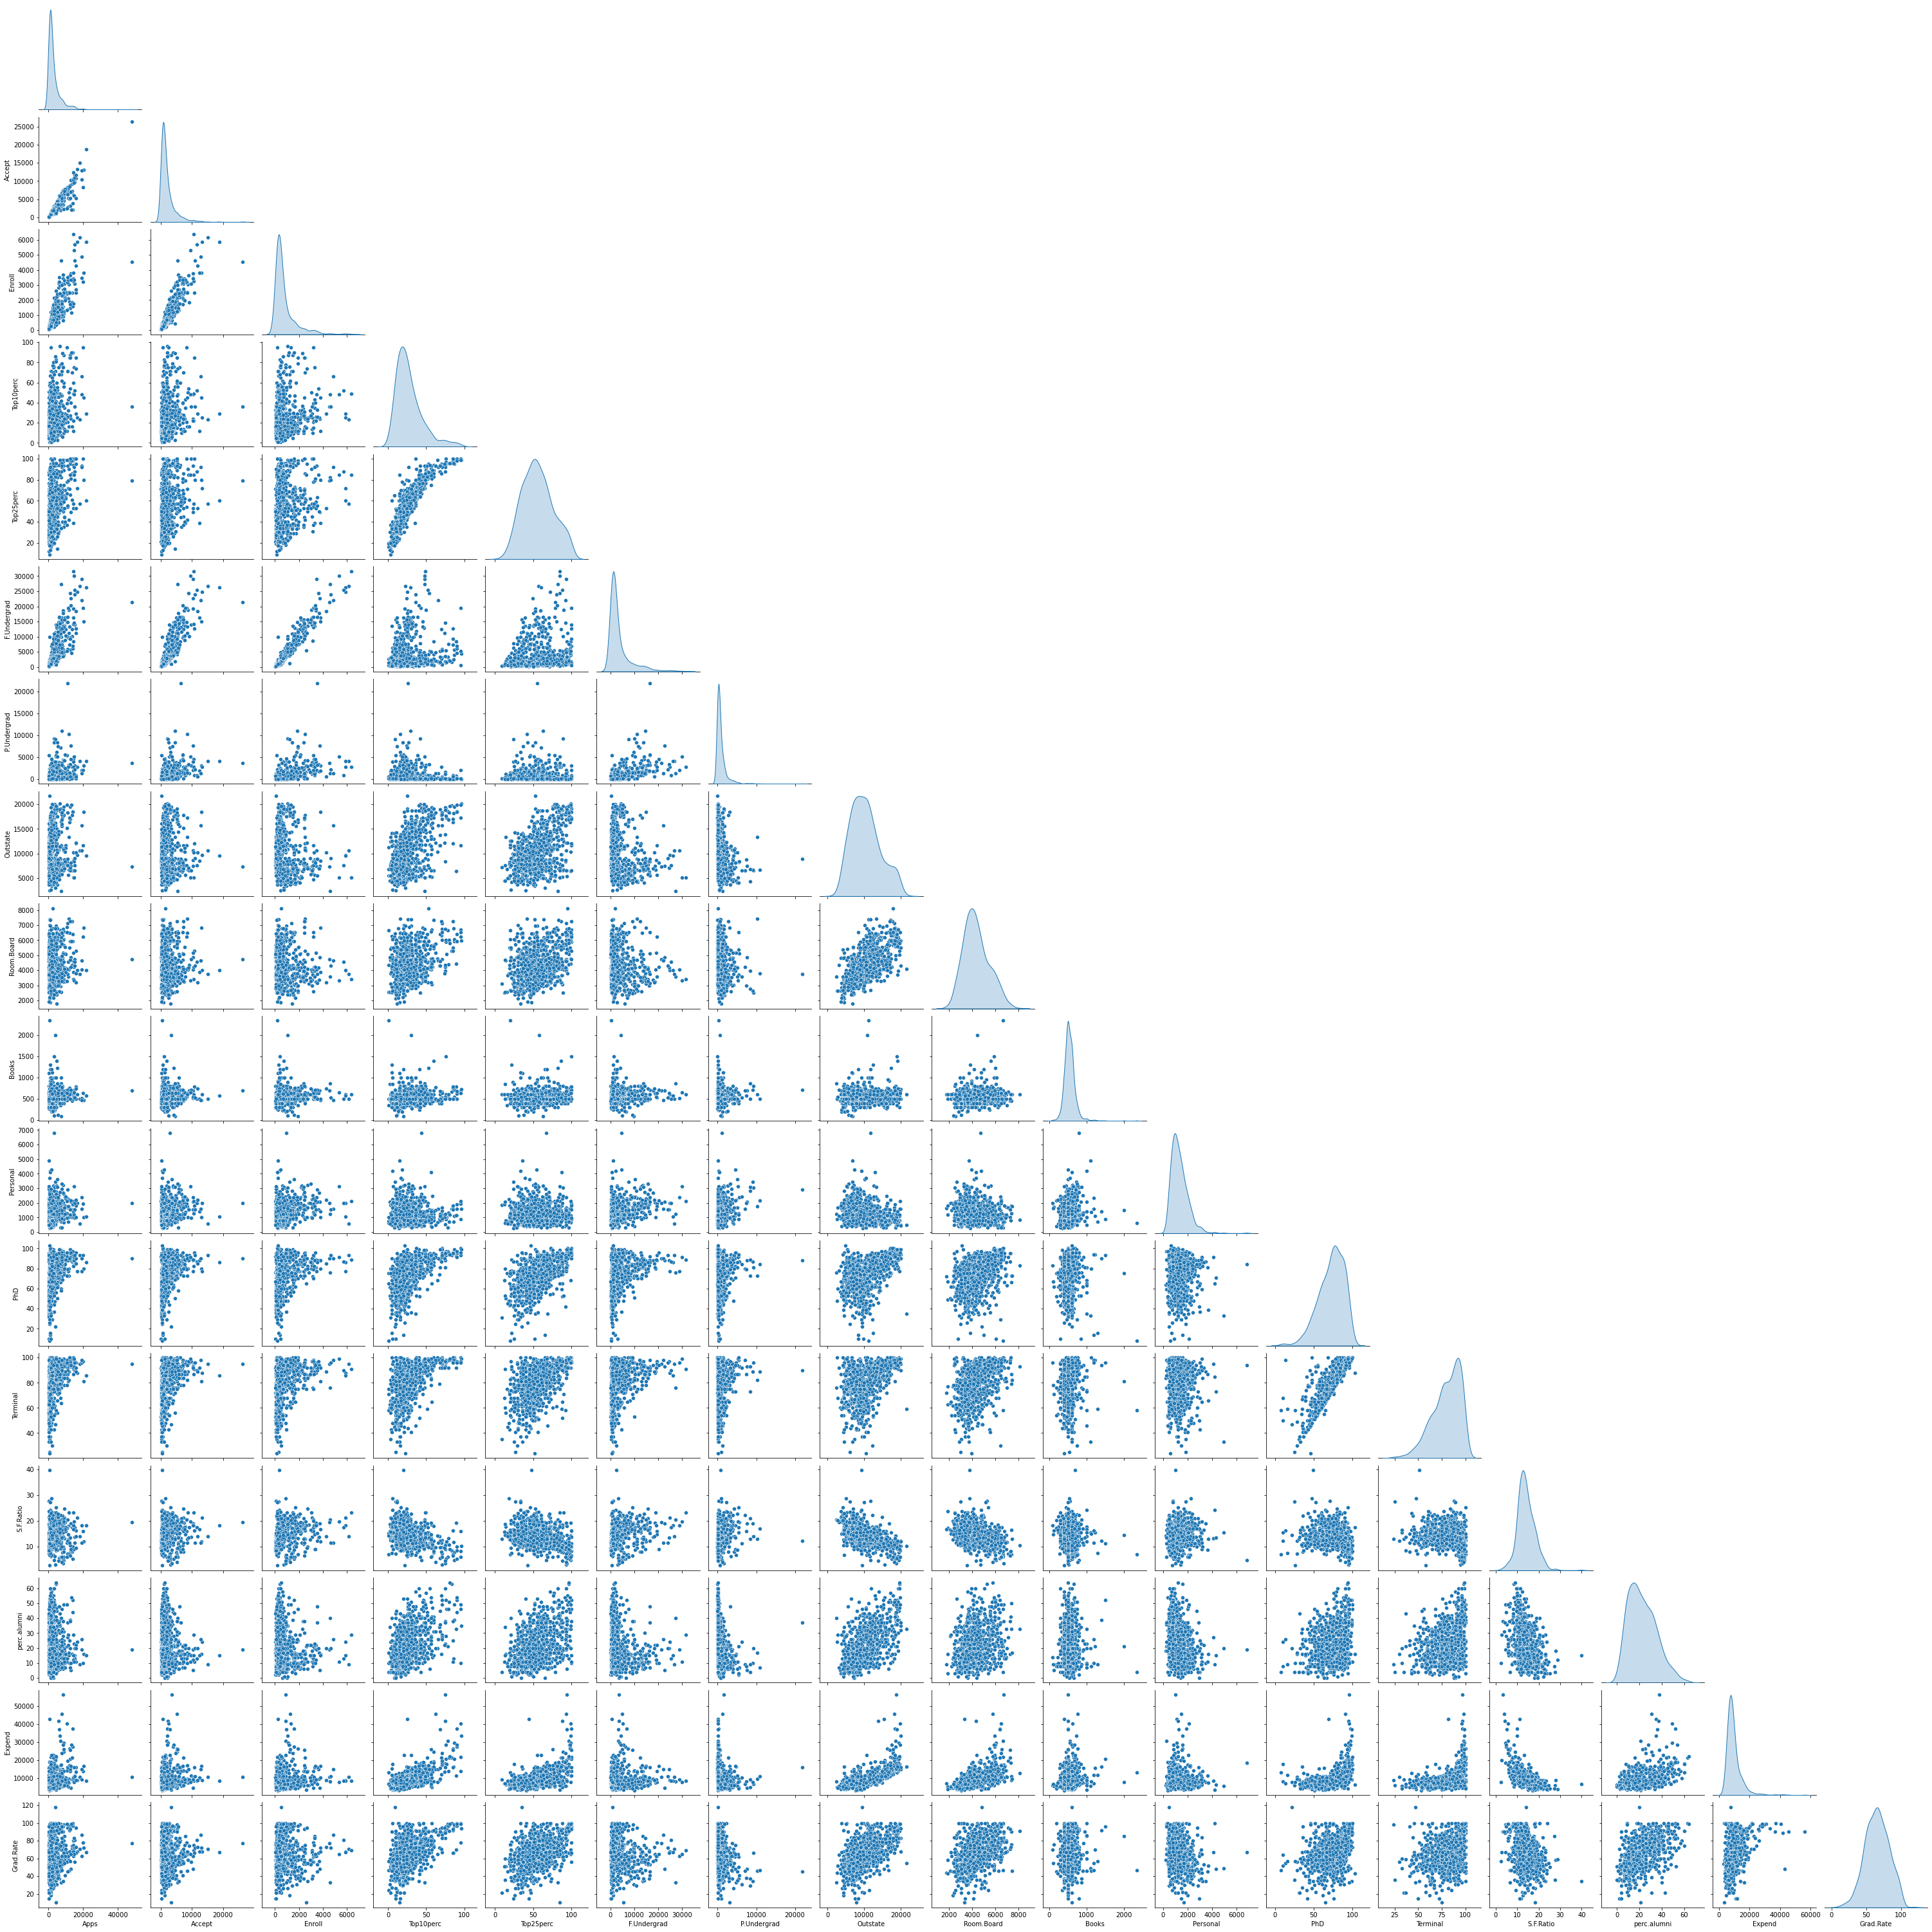

In [19]:
# Pair Plot

sns.pairplot(df, diag_kind='kde', corner=True)

<AxesSubplot:>

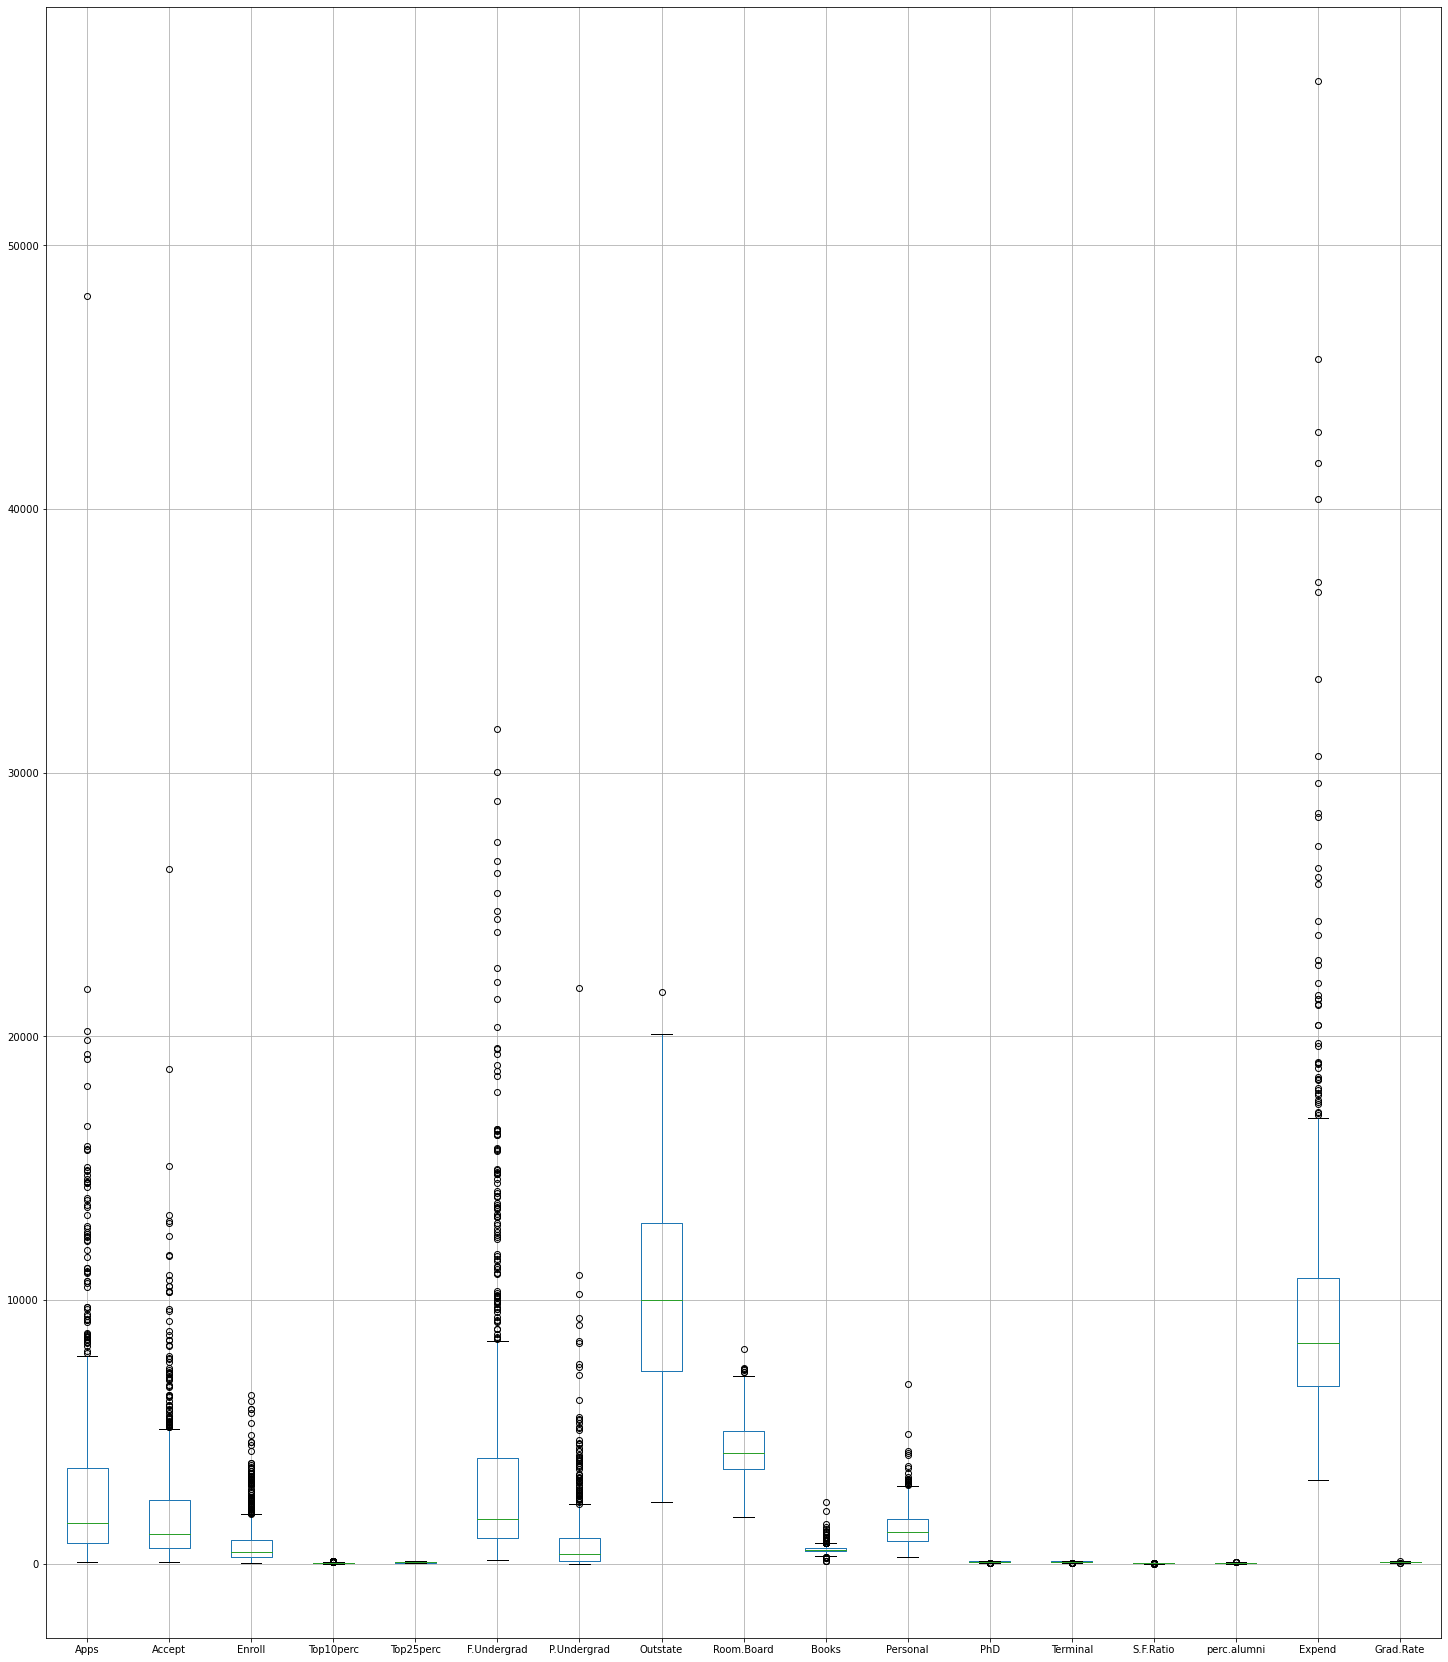

In [20]:
# Box plot
plt.subplots(figsize=(25,30))
df.boxplot(figsize=(25,20))

In [21]:
# We observe some attributes have outliers.
# Outliers will be handled here

# def removeOutlier(col):
#     sorted(col)
#     Q1, Q3 = np.percentile(col, [25,75])
#     IQR = Q3-Q1
#     lowerLimit = Q1 - (1.5 * IQR)
#     upperLimit = Q3 + (1.5 * IQR)
#     return lowerLimit, upperLimit
# 
# ll, ul = removeOutlier(df['Apps'])
# df['Apps'] = np.where(df['Apps'] > ul, ul, df['Apps'])
# df['Apps'] = np.where(df['Apps'] < ll, ll, df['Apps'])
# 
# ll, ul = removeOutlier(df['Accept'])
# df['Accept'] = np.where(df['Accept'] > ul, ul, df['Accept'])
# df['Accept'] = np.where(df['Accept'] < ll, ll, df['Accept'])
# 
# ll, ul = removeOutlier(df['Enroll'])
# df['Enroll'] = np.where(df['Enroll'] > ul, ul, df['Enroll'])
# df['Enroll'] = np.where(df['Enroll'] < ll, ll, df['Enroll'])
# 
# ll, ul = removeOutlier(df['Top10perc'])
# df['Top10perc'] = np.where(df['Top10perc'] > ul, ul, df['Top10perc'])
# df['Top10perc'] = np.where(df['Top10perc'] < ll, ll, df['Top10perc'])
# 
# ll, ul = removeOutlier(df['F.Undergrad'])
# df['F.Undergrad'] = np.where(df['F.Undergrad'] > ul, ul, df['F.Undergrad'])
# df['F.Undergrad'] = np.where(df['F.Undergrad'] < ll, ll, df['F.Undergrad'])
# 
# ll, ul = removeOutlier(df['P.Undergrad'])
# df['P.Undergrad'] = np.where(df['P.Undergrad'] > ul, ul, df['P.Undergrad'])
# df['P.Undergrad'] = np.where(df['P.Undergrad'] < ll, ll, df['P.Undergrad'])
# 
# ll, ul = removeOutlier(df['Outstate'])
# df['Outstate'] = np.where(df['Outstate'] > ul, ul, df['Outstate'])
# df['Outstate'] = np.where(df['Outstate'] < ll, ll, df['Outstate'])
# 
# ll, ul = removeOutlier(df['Room.Board'])
# df['Room.Board'] = np.where(df['Room.Board'] > ul, ul, df['Room.Board'])
# df['Room.Board'] = np.where(df['Room.Board'] < ll, ll, df['Room.Board'])
# 
# ll, ul = removeOutlier(df['Books'])
# df['Books'] = np.where(df['Books'] > ul, ul, df['Books'])
# df['Books'] = np.where(df['Books'] < ll, ll, df['Books'])
# 
# ll, ul = removeOutlier(df['Personal'])
# df['Personal'] = np.where(df['Personal'] > ul, ul, df['Personal'])
# df['Personal'] = np.where(df['Personal'] < ll, ll, df['Personal'])
# 
# ll, ul = removeOutlier(df['Expend'])
# df['Expend'] = np.where(df['Expend'] > ul, ul, df['Expend'])
# df['Expend'] = np.where(df['Expend'] < ll, ll, df['Expend'])
# 
# ll, ul = removeOutlier(df['PhD'])
# df['PhD'] = np.where(df['PhD'] > ul, ul, df['PhD'])
# df['PhD'] = np.where(df['PhD'] < ll, ll, df['PhD'])
# 
# ll, ul = removeOutlier(df['Terminal'])
# df['Terminal'] = np.where(df['Terminal'] > ul, ul, df['Terminal'])
# df['Terminal'] = np.where(df['Terminal'] < ll, ll, df['Terminal'])
# 
# ll, ul = removeOutlier(df['S.F.Ratio'])
# df['S.F.Ratio'] = np.where(df['S.F.Ratio'] > ul, ul, df['S.F.Ratio'])
# df['S.F.Ratio'] = np.where(df['S.F.Ratio'] < ll, ll, df['S.F.Ratio'])
# 
# 
# ll, ul = removeOutlier(df['perc.alumni'])
# df['perc.alumni'] = np.where(df['perc.alumni'] > ul, ul, df['perc.alumni'])
# df['perc.alumni'] = np.where(df['perc.alumni'] < ll, ll, df['perc.alumni'])
# 
# ll, ul = removeOutlier(df['Grad.Rate'])
# df['Grad.Rate'] = np.where(df['Grad.Rate'] > ul, ul, df['Grad.Rate'])
# df['Grad.Rate'] = np.where(df['Grad.Rate'] < ll, ll, df['Grad.Rate'])

<AxesSubplot:>

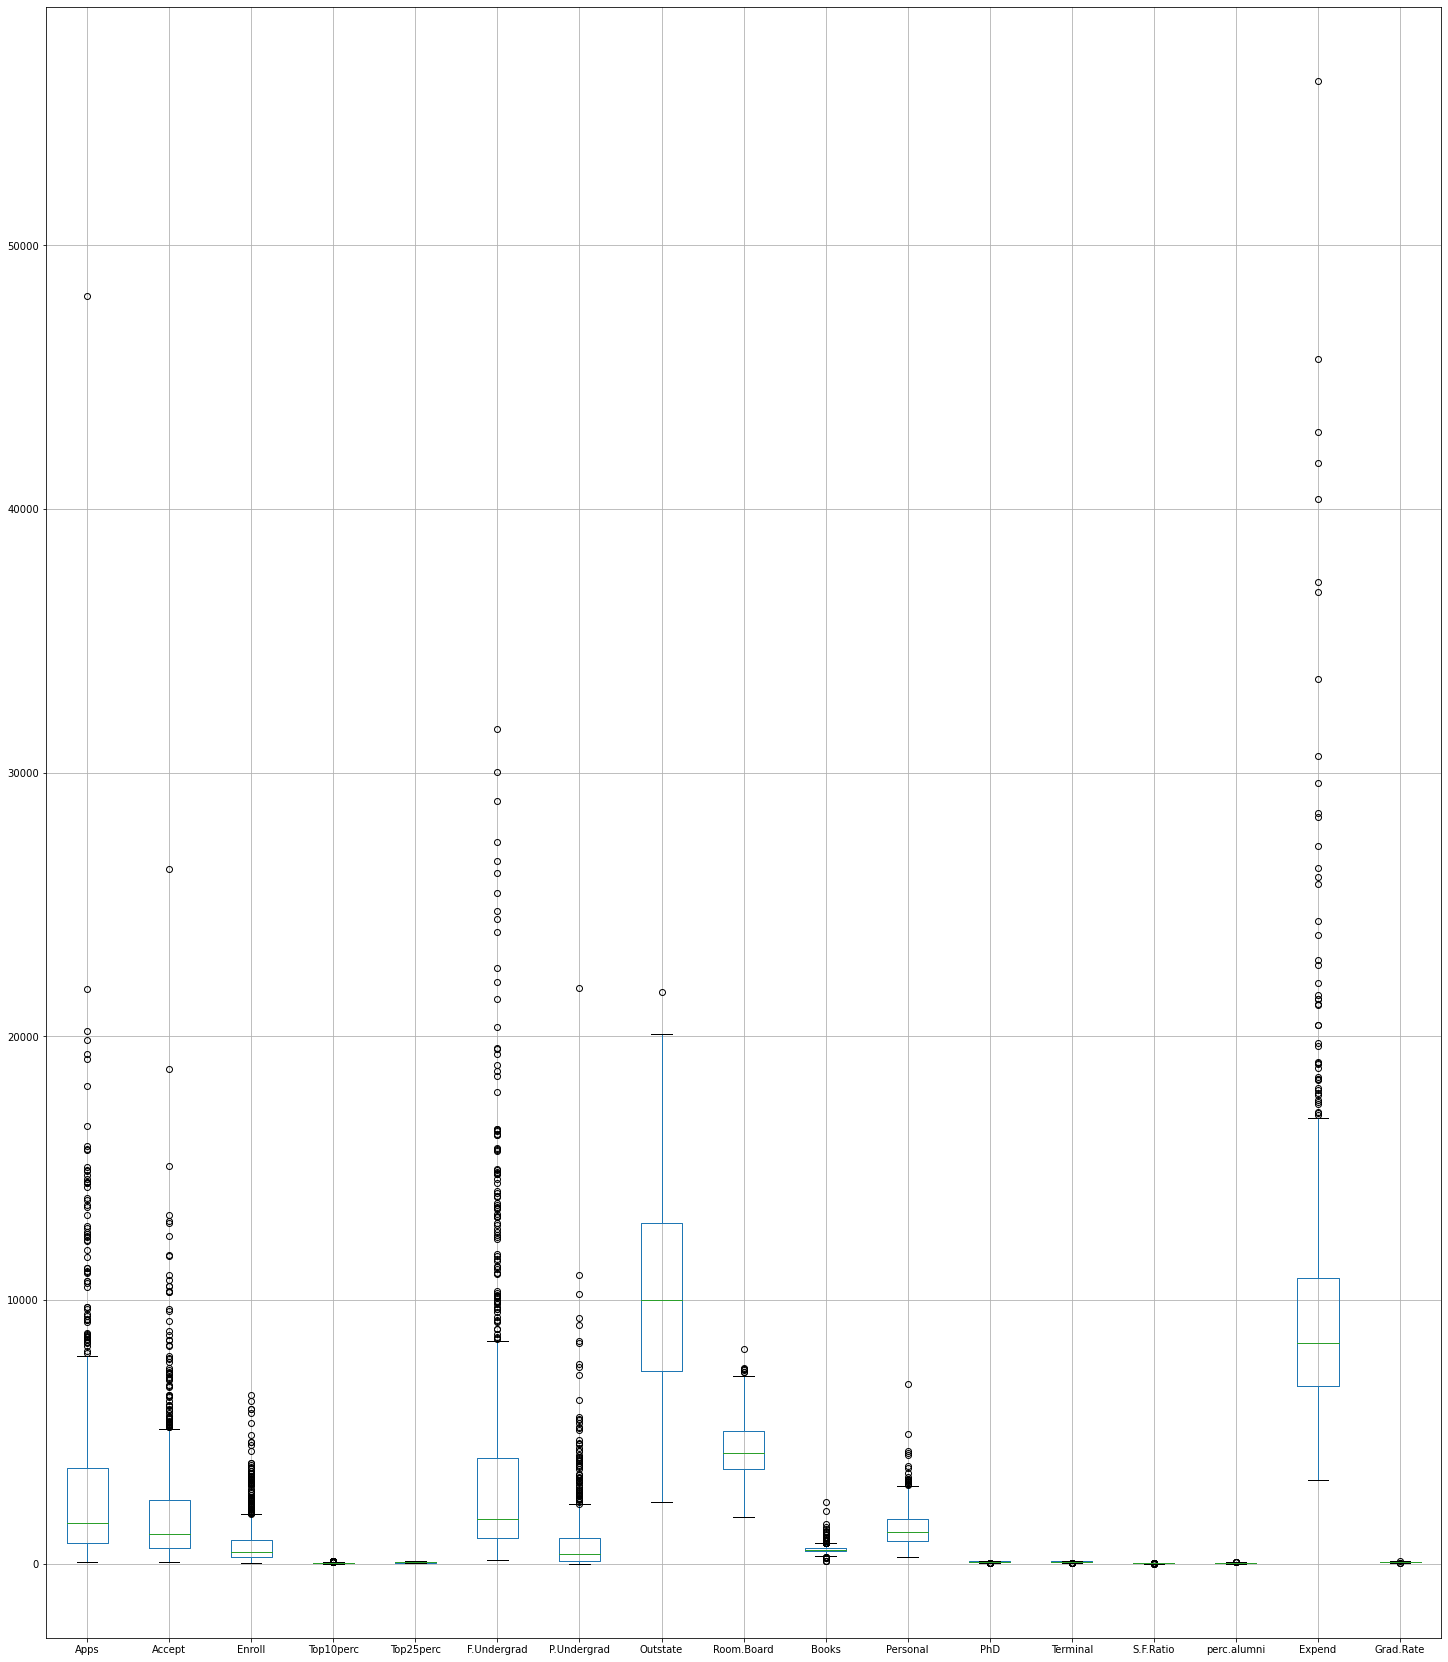

In [22]:
plt.subplots(figsize=(25,30))
df.boxplot(figsize=(25,20))

In [23]:
dropdf = df.drop(['Names'], axis=1)

In [24]:
dropdf.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [25]:
# Standardize and Scale the data before PCA
# Has many attributes with max values, so scaling is necessary.

from scipy.stats import zscore

dfnew=dropdf.apply(zscore)
dfnew.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

<AxesSubplot:>

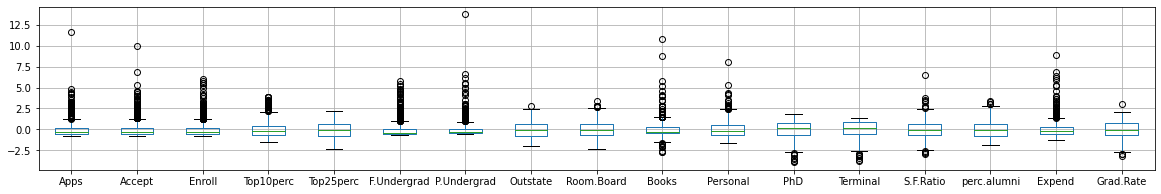

In [26]:
dfnew.boxplot(figsize=(20,3))

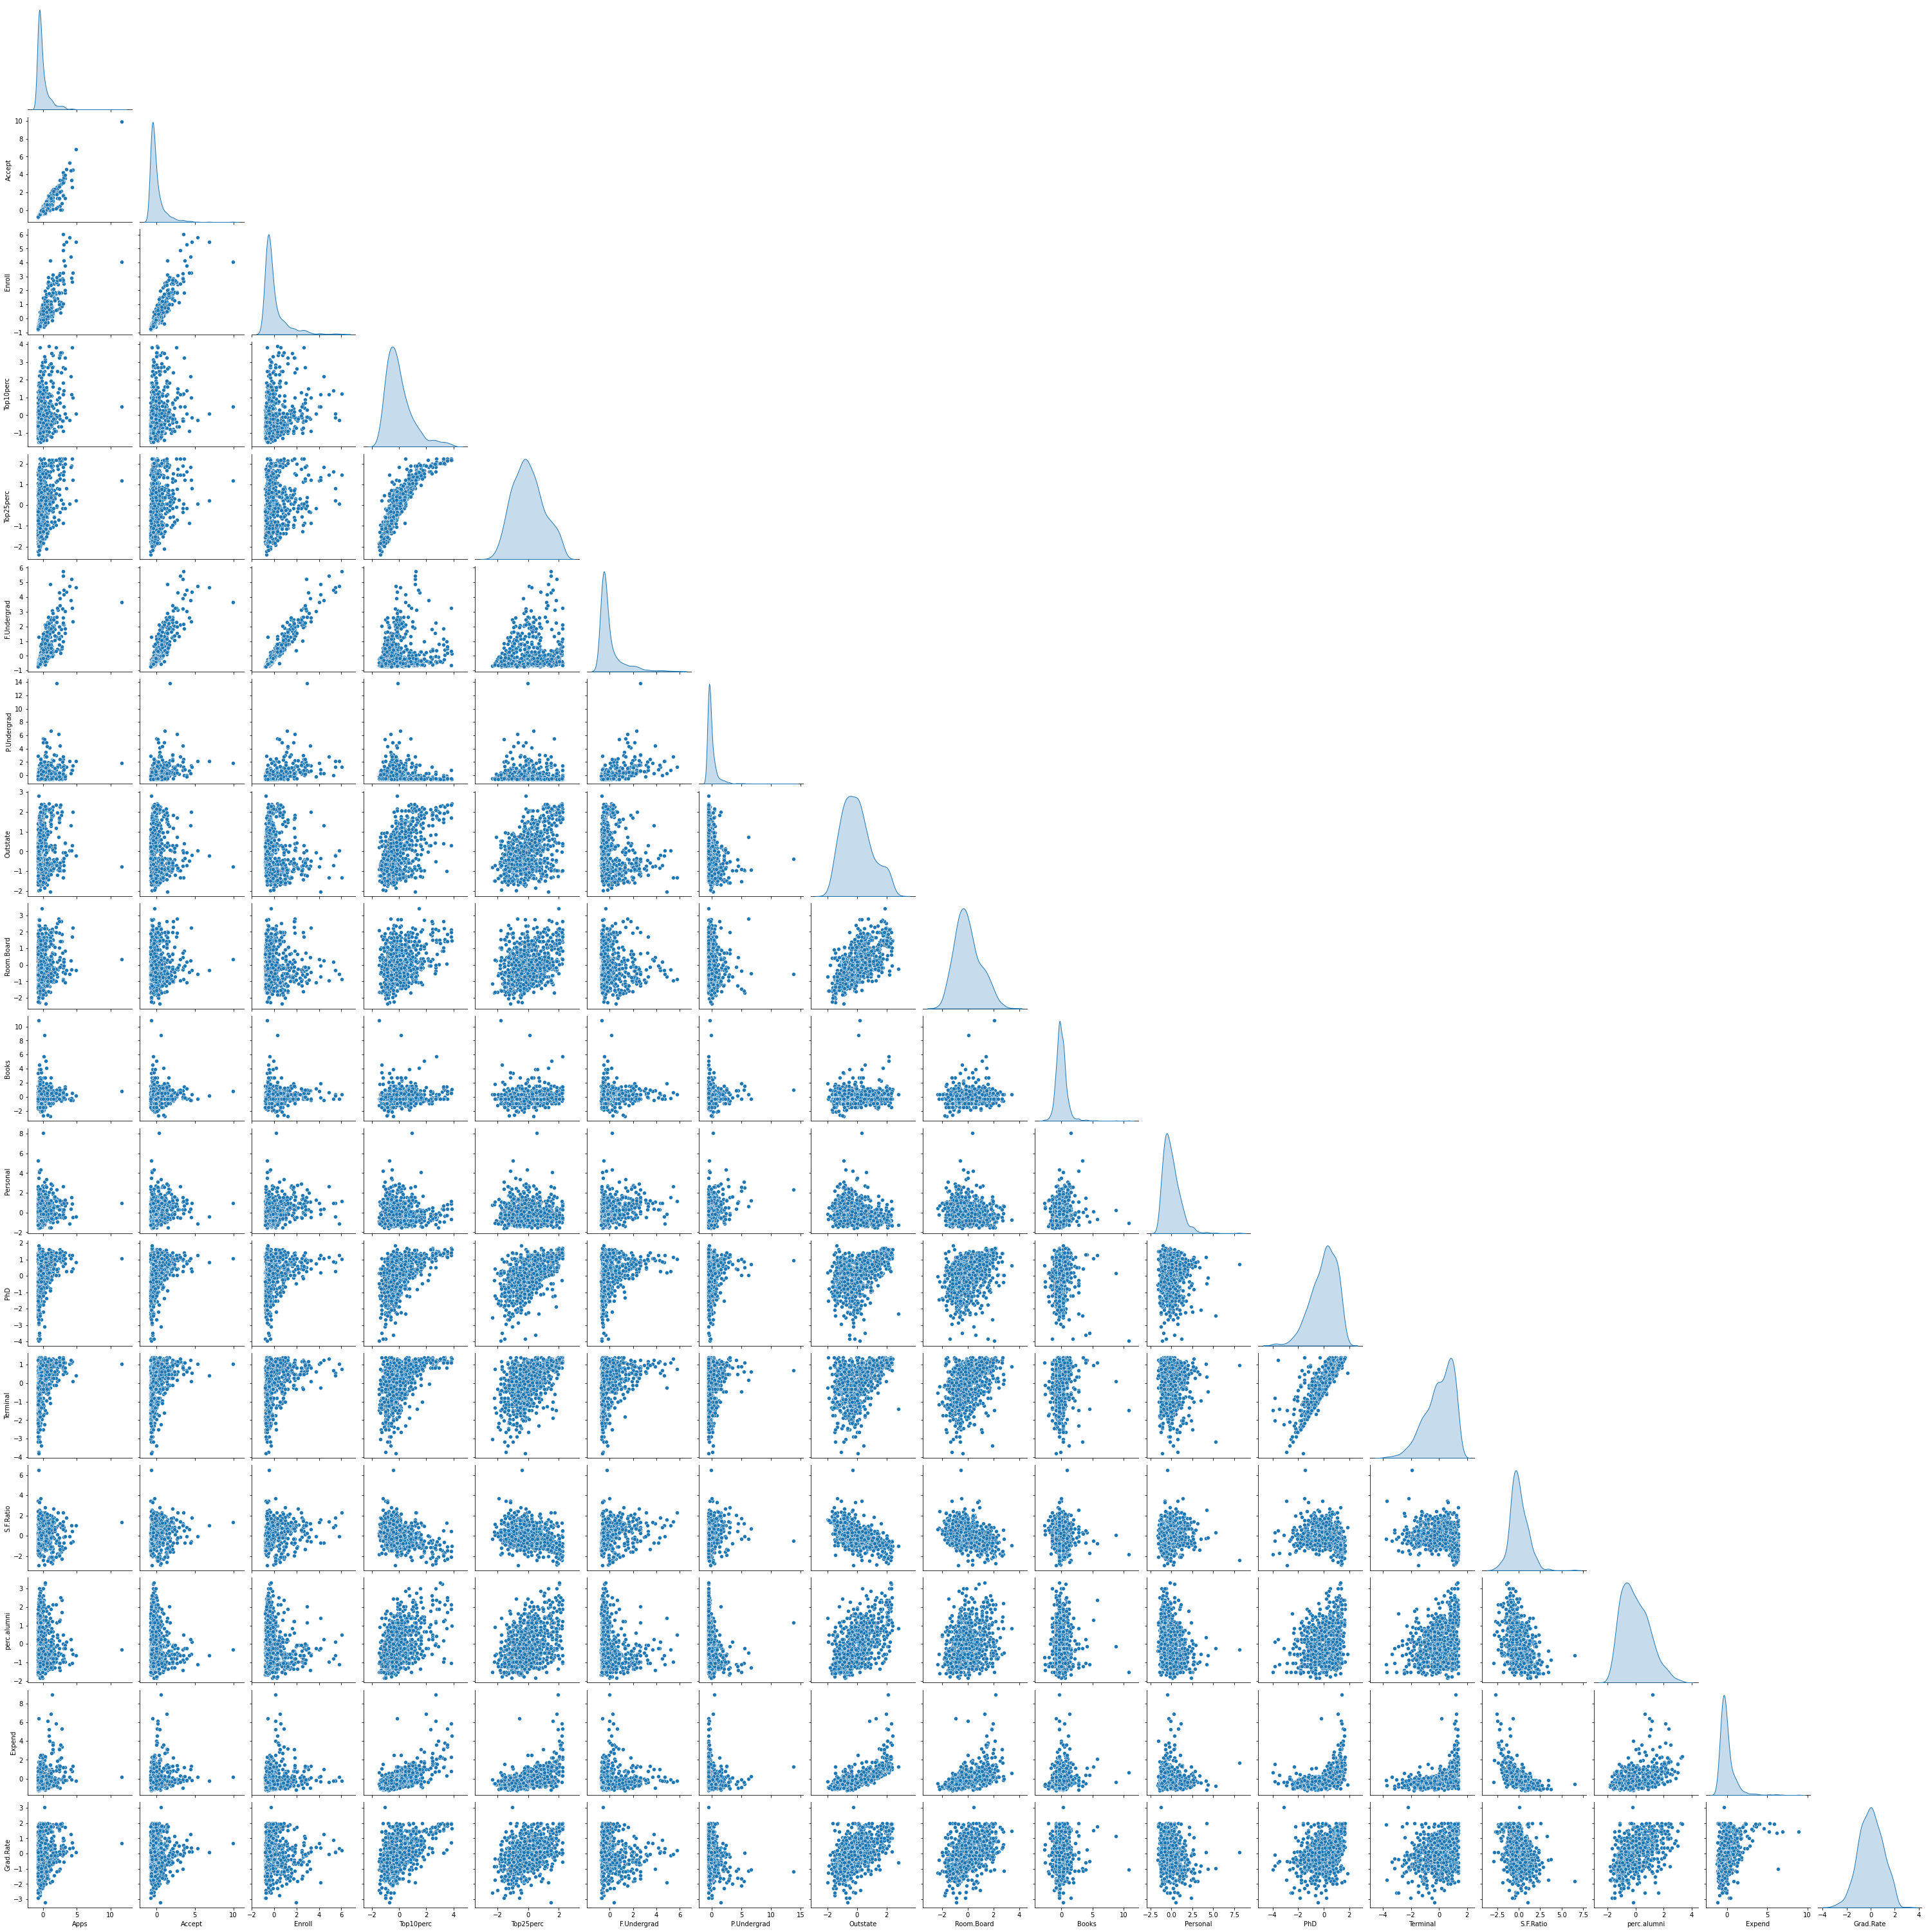

In [27]:
sns.pairplot(dfnew, diag_kind='kde', corner=True)

In [28]:
# Create Co-Variance Matrix to indentify Principal Components

cov_matrix = np.cov(dfnew.T)
print('Covariance Matrix', cov_matrix)

Covariance Matrix [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0.

In [29]:
# Compare Correlation matrix with Covaraiance Matrix

df_corr = dropdf.copy()
df_corr.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [30]:
dfnew.corr()

# Standardisation/Sacling does not affect the correlation results of the data.

# We can state that below three approaches yield the same eigenvectors and eigenvalue pairs:
# 
# 1.Eigen decomposition of the covariance matrix after standardizing the data.
# 2.Eigen decomposition of the correlation matrix.
# 3.Eigen decomposition of the correlation matrix after standardizing the data.
# Finally we can say that after scaling - the covariance and the correlation have the same values.

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

### Identify Eigen Values and Eigen Vector

In [31]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

In [32]:
eig_vecs

array([[-2.48765602e-01,  3.31598227e-01,  6.30921033e-02,
        -2.81310530e-01,  5.74140964e-03,  1.62374420e-02,
         4.24863486e-02,  1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02,  3.58970400e-01, -4.59139498e-01,
         4.30462074e-02, -1.33405806e-01,  8.06328039e-02,
        -5.95830975e-01,  2.40709086e-02],
       [-2.07601502e-01,  3.72116750e-01,  1.01249056e-01,
        -2.67817346e-01,  5.57860920e-02, -7.53468452e-03,
         1.29497196e-02,  5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02, -5.43427250e-01,  5.18568789e-01,
        -5.84055850e-02,  1.45497511e-01,  3.34674281e-02,
        -2.92642398e-01, -1.45102446e-01],
       [-1.76303592e-01,  4.03724252e-01,  8.29855709e-02,
        -1.61826771e-01, -5.56936353e-02,  4.25579803e-02,
         2.76928937e-02, -5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.09651110e-01,  4.04318439e-01,
        -6.93988831e-02, -2.95896092e-02, -8.56967180e-02,
         4.44638207e-01,  1.1

In [33]:
# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

np.round(eig_vecs[0], 2)

array([-0.25,  0.33,  0.06, -0.28,  0.01,  0.02,  0.04,  0.1 ,  0.09,
       -0.05,  0.36, -0.46,  0.04, -0.13,  0.08, -0.6 ,  0.02])

### Cumulative distribution of Eigen Values

In [34]:
tot = sum(eig_vals)
varexp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
cumvarexp = np.cumsum(varexp)
print('Variance: \n', varexp)

Variance: 
 [32.02062819886915, 26.340214436112458, 6.900916554222499, 5.922989222926297, 5.4884051103584905, 4.984700954557445, 3.558871491746655, 3.453621336999266, 3.117233679821716, 2.3751915258937992, 1.8414263209386865, 1.2960414001235339, 0.9857541228001173, 0.8458423350830037, 0.5171255833731913, 0.21575401007275546, 0.1352837161009504]


In [35]:
print('Cumulative Variance Explained: \n', cumvarexp)

# Below cumulative variance explains that the top 5 Principal Components shall make up to 80% of variance.
# It's suggested to consider 4 or 5 Principal Components for further analysis.

Cumulative Variance Explained: 
 [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


### Scree Plot

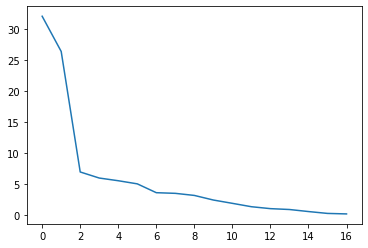

In [36]:
plt.plot(varexp)

# We can observe that there is a steep drop in variance explained with increase in number of PCs.
# Preliminary from the below graph, 4-6 components may constitute to 90% variation.

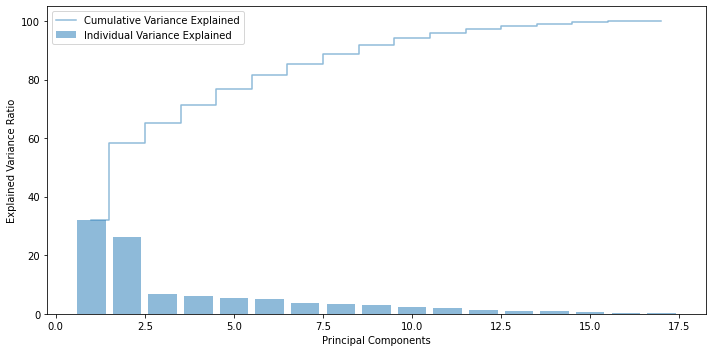

In [37]:
# Plot the scree plot

plt.figure(figsize=(10, 5))
plt.bar(range(1, eig_vals.size + 1), varexp, alpha=0.5, align='center', label='Individual Variance Explained')
plt.step(range(1, eig_vals.size + 1), cumvarexp, where='mid', alpha=0.5, label='Cumulative Variance Explained')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 5 principal components make up to 80% variance, rest  of the principal components we can ignore.

##  Find PCA using sklearn and Transform the data to the components formed

In [38]:
from sklearn.decomposition import PCA

# From the above graph it's evident that 80% variance is caused by 4-5 principal components.
# There by we are reducing the dimensions from 16 to 5.

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(dfnew)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352401e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073388e-01,  2.27879815e+00, -4.38092805e-01, ...,
        -4.05344357e-04,  2.07356334e+00, -1.32891499e+00],
       [-9.21749380e-01,  3.58891832e+00,  6.77240528e-01, ...,
         5.43164479e-02,  8.52053704e-01, -1.08022490e-01],
       [-7.43975266e-01,  1.05999658e+00, -3.69613269e-01, ...,
        -5.16020936e-01, -9.47754891e-01, -1.13217582e+00]])

In [39]:
pca_df = pd.DataFrame(pca.components_, columns=list(dfnew))
print(pca_df)

       Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  


In [40]:
# Show the components
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309212, -0.10124904, -0.08298555,  0.03505554, -0.02414794,
        -0.061393  ,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603754, -0.2898484 , -0.14698927,
         0.22674399, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182677, -0.05154725, -0.10976654,
         0.10041233, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [41]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405])

In [42]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6])

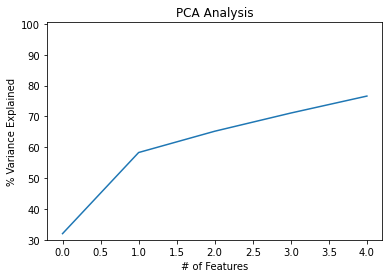

In [43]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

### Find Corelation between components and features

In [44]:
df_comp = pd.DataFrame(pca.components_, columns=list(dfnew))
df_comp.head(10)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

<AxesSubplot:>

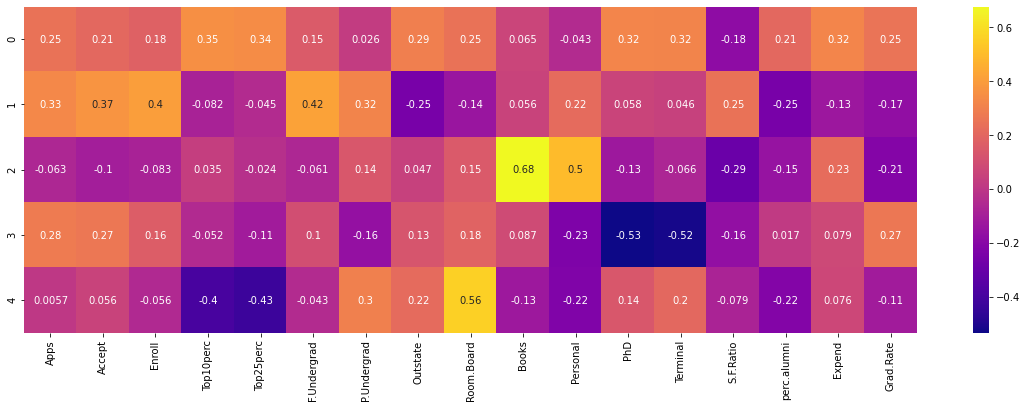

In [45]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_comp, annot=True, cmap='plasma')

## Let's identify which features have maximum loading across the components.



In [46]:
from matplotlib.patches import Rectangle

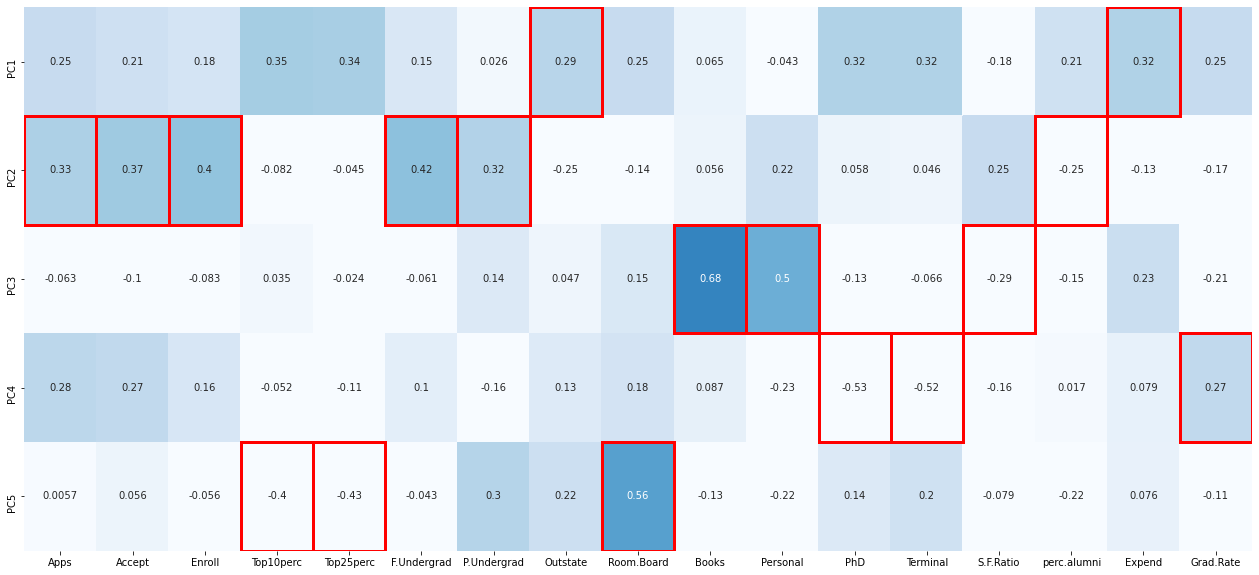

In [47]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_comp, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5'])

column_max = df_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_comp.columns):
    position = df_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [48]:
# ['pc_outstate_student_expenditure', 
# 'pc_undergrad_alumni_donations', 
# 'pc_faculty_cost_student_expend', 
# 'pc_Room_Board_Cost_for_Top_Students', 
# 'pc_Faculty_Qualification_Student_GraduationRate']

cols = ['pc_outstate_student_expenditure', 
'pc_undergrad_alumni_donations', 
'pc_faculty_cost_student_expend', 
'pc_faculty_qualification_student_graduation_rate', 
'pc_room_board_cost_for_top_students']

df_pca = pd.DataFrame(data_reduced, columns = cols)
df_pca.head(10)

pc_outstate_student_expenditure  pc_undergrad_alumni_donations  \
0                        -1.592855                       0.767334   
1                        -2.192402                      -0.578830   
2                        -1.430964                      -1.092819   
3                         2.855557                      -2.630612   
4                        -2.212008                       0.021631   
5                        -0.571665                      -1.496325   
6                         0.241952                      -1.506368   
7                         1.750474                      -1.461412   
8                         0.769127                      -1.984433   
9                        -2.770721                      -0.844611   

   pc_faculty_cost_student_expend  \
0                       -0.101073   
1                        2.278798   
2                       -0.438093   
3                        0.141722   
4                        2.387030   
5                        0.024354   
6                        0.234194   
7                       -1.026589   
8                       -1.426052   
9                        1.627987   

   pc_faculty_qualification_student_graduation_rate  \
0                                         -0.921749   
1                                          3.588918   
2                                          0.677241   
3                                         -1.295486   
4                                         -1.114538   
5                                          0.066944   
6                                         -1.142024   
7                                         -0.981184   
8                                         -0.071424   
9                                          1.705091   

   pc_room_board_cost_for_top_students  
0                            -0.743975  
1                             1.059997  
2                            -0.369613  
3                            -0.183837  
4                             0.684451  
5                            -0.376262  
6                             1.546983  
7                             0.217044  
8                             0.586380  
9                            -1.019826

In [49]:
df_con = pd.concat([df.Names, df_pca], axis=1)
df_con

Names  pc_outstate_student_expenditure  \
0      Abilene Christian University                        -1.592855   
1                Adelphi University                        -2.192402   
2                    Adrian College                        -1.430964   
3               Agnes Scott College                         2.855557   
4         Alaska Pacific University                        -2.212008   
..                              ...                              ...   
772         Worcester State College                        -3.328458   
773               Xavier University                         0.199389   
774  Xavier University of Louisiana                        -0.732561   
775                 Yale University                         7.919327   
776    York College of Pennsylvania                        -0.469508   

     pc_undergrad_alumni_donations  pc_faculty_cost_student_expend  \
0                         0.767334                       -0.101073   
1                        -0.578830                        2.278798   
2                        -1.092819                       -0.438093   
3                        -2.630612                        0.141722   
4                         0.021631                        2.387030   
..                             ...                             ...   
772                       1.220255                       -0.383388   
773                      -0.686689                        0.051564   
774                      -0.077235                       -0.000405   
775                      -2.068329                        2.073563   
776                       0.366661                       -1.328915   

     pc_faculty_qualification_student_graduation_rate  \
0                                           -0.921749   
1                                            3.588918   
2                                            0.677241   
3                                           -1.295486   
4                                           -1.114538   
..                                                ...   
772                                          0.108555   
773                                          0.562269   
774                                          0.054316   
775                                          0.852054   
776                                         -0.108022   

     pc_room_board_cost_for_top_students  
0                              -0.743975  
1                               1.059997  
2                              -0.369613  
3                              -0.183837  
4                               0.684451  
..                                   ...  
772                             0.776996  
773                             0.375191  
774                            -0.516021  
775                            -0.947755  
776                            -1.132176  

[777 rows x 6 columns]